## Import libraries

In [1]:
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Load source datasets

In [2]:
train_df = pd.read_csv("../input/mathcothon/train.csv")
test_df = pd.read_csv("../input/mathcothon/test.csv")
print(f"train_df: {train_df.shape} \ntest_df: {test_df.shape}")

train_df: (19237, 18) 
test_df: (8245, 18)


## Examine duplicates

In [3]:
check_cols = [col for col in train_df.columns if col not in ['ID','Price']]

In [4]:
print(f"Duplicate records: {train_df[train_df.duplicated(subset=check_cols, keep=False)].shape[0]}")
train_df[train_df.duplicated(subset=check_cols, keep=False)].sort_values(by='ID').head(10)

Duplicate records: 5241


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
7269,35464629,7840,1111,HONDA,FIT,2012,Hatchback,No,Petrol,1.3,108000 km,4.0,Automatic,Front,04-May,Right-hand drive,Blue,6
5754,35464629,7840,1111,HONDA,FIT,2012,Hatchback,No,Petrol,1.3,108000 km,4.0,Automatic,Front,04-May,Right-hand drive,Blue,6
6732,36559154,19726,-,MERCEDES-BENZ,Sprinter 411,2002,Goods wagon,No,Diesel,2.2 Turbo,280000 km,4.0,Manual,Rear,02-Mar,Left wheel,White,2
1107,36559154,19726,-,MERCEDES-BENZ,Sprinter 411,2002,Goods wagon,No,Diesel,2.2 Turbo,280000 km,4.0,Manual,Rear,02-Mar,Left wheel,White,2
9990,41770767,11917,-,NISSAN,Murano,2004,Jeep,Yes,CNG,3.5,233600 km,6.0,Variator,4x4,04-May,Left wheel,Silver,6
13822,41770767,11917,-,NISSAN,Murano,2004,Jeep,Yes,CNG,3.5,233600 km,6.0,Variator,4x4,04-May,Left wheel,Silver,6
8158,42412373,15367,781,CHEVROLET,Trax,2018,Jeep,Yes,Petrol,1.4,1405 km,4.0,Automatic,4x4,04-May,Left wheel,Black,8
9275,42412373,15367,781,CHEVROLET,Trax,2018,Jeep,Yes,Petrol,1.4,1405 km,4.0,Automatic,4x4,04-May,Left wheel,Black,8
4863,42444388,32929,-,CHEVROLET,Equinox,2016,Jeep,No,Petrol,2.4,57600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
8177,42444388,32929,-,CHEVROLET,Equinox,2016,Jeep,No,Petrol,2.4,57600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12


In [5]:
print(f"Duplicate records: {test_df[test_df.duplicated(subset=check_cols, keep=False)].shape[0]}")
test_df[test_df.duplicated(subset=check_cols, keep=False)].sort_values(by='ID').head(10)

Duplicate records: 1748


,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
7765,43486718,-,TOYOTA,CHR,2017,Hatchback,No,Petrol,2,16946 km,4,Tiptronic,Front,04-May,Left wheel,Black,0,NaN
5713,43486718,-,TOYOTA,CHR,2017,Hatchback,No,Petrol,2,16946 km,4,Tiptronic,Front,04-May,Left wheel,Black,0,NaN
7168,44312106,-,SUZUKI,Aerio,2001,Hatchback,No,Petrol,1.5,202000 km,2,Automatic,Front,04-May,Right-hand drive,White,6,NaN
5268,44312106,-,SUZUKI,Aerio,2001,Hatchback,No,Petrol,1.5,202000 km,2,Automatic,Front,04-May,Right-hand drive,White,6,NaN
2021,45282558,-,MERCEDES-BENZ,GLC 250,2018,Jeep,Yes,Petrol,2.0 Turbo,37554 km,8,Tiptronic,4x4,04-May,Left wheel,Black,12,NaN
7840,45282558,-,MERCEDES-BENZ,GLC 250,2018,Jeep,Yes,Petrol,2.0 Turbo,37554 km,8,Tiptronic,4x4,04-May,Left wheel,Black,12,NaN
261,45432915,-,HONDA,Cr-v,1998,Jeep,No,Petrol,2,282099 km,4,Automatic,Front,04-May,Left wheel,Black,0,NaN
7403,45432915,-,HONDA,Cr-v,1998,Jeep,No,Petrol,2,282099 km,4,Automatic,Front,04-May,Left wheel,Black,0,NaN
2815,45432915,-,HONDA,Cr-v,1998,Jeep,No,Petrol,2,282099 km,4,Automatic,Front,04-May,Left wheel,Black,0,NaN
6344,45432915,-,HONDA,Cr-v,1998,Jeep,No,Petrol,2,282099 km,4,Automatic,Front,04-May,Left wheel,Black,0,NaN


In [6]:
# Remove duplicates in train data
check_cols = [col for col in train_df.columns if col != 'ID']
train_df = train_df[~train_df.duplicated(subset=check_cols, keep='first')].copy()
print(f"train_df: {train_df.shape}")
train_df.head()

train_df: (15725, 18)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [7]:
train_df[train_df.duplicated(keep=False)]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags


## Examine data leakage

In [8]:
check_cols = [col for col in train_df.columns if col not in ['ID','Price']]

df = pd.merge(
    train_df[check_cols], 
    test_df[check_cols], 
    how='inner', 
    on=check_cols,
    sort=False
)

df = df[~df.duplicated(keep='first')]
print(f"Leakage records: {df.shape[0]}")
df.head()

Leakage records: 1289


,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
9,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
13,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
14,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
18,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,184467 km,6.0,Automatic,Rear,04-May,Left wheel,White,12


## Examine target data

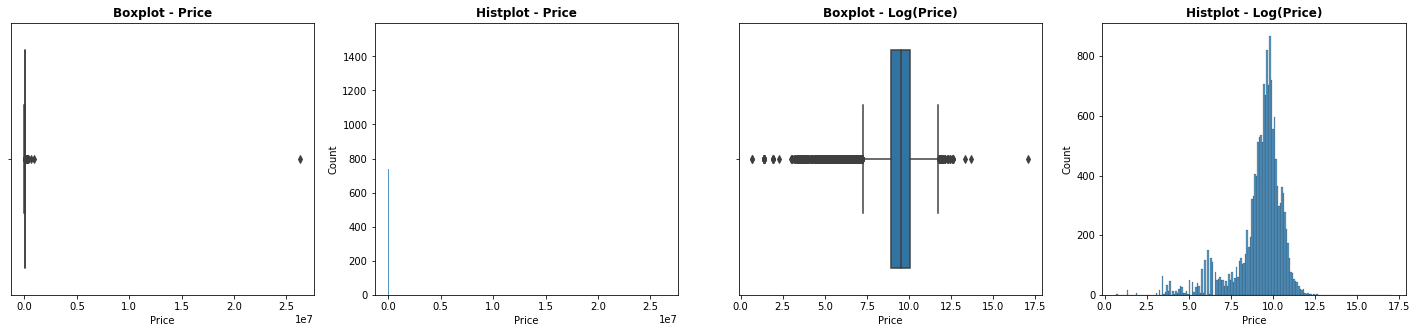

In [9]:
x1 = train_df['Price']
x2 = np.log1p(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title("Boxplot - Price", fontweight='bold');
ax[1].set_title("Histplot - Price", fontweight='bold');
ax[2].set_title("Boxplot - Log(Price)", fontweight='bold');
ax[3].set_title("Histplot - Log(Price)", fontweight='bold');

In [10]:
# Remove outlier in target data
train_df = train_df[train_df['Price']<400000].copy()

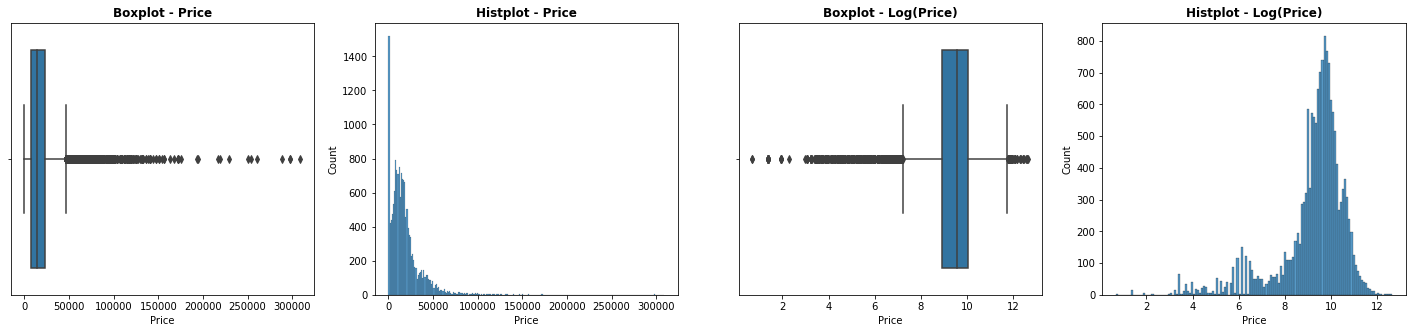

In [11]:
x1 = train_df['Price']
x2 = np.log1p(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title("Boxplot - Price", fontweight='bold');
ax[1].set_title("Histplot - Price", fontweight='bold');
ax[2].set_title("Boxplot - Log(Price)", fontweight='bold');
ax[3].set_title("Histplot - Log(Price)", fontweight='bold');

In [12]:
train_df['Price'] = np.log1p(train_df['Price'])
train_df = train_df[train_df['Price']>3].copy()
print(f"train_df: {train_df.shape}")

train_df: (15697, 18)


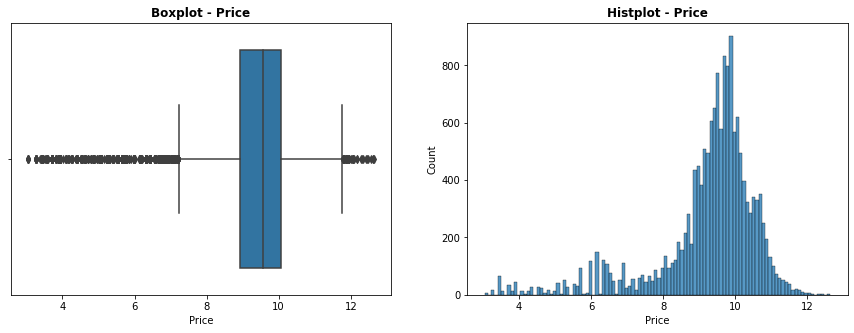

In [13]:
x1 = train_df['Price']

_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
ax[0].set_title("Boxplot - Price", fontweight='bold');
ax[1].set_title("Histplot - Price", fontweight='bold');

## Examine categorical data mismatches

### Manufacturer

In [14]:
train_df['Manufacturer'] = train_df['Manufacturer'].apply(lambda x: 'UNKNOWN' if x == 'სხვა' else x)
test_df['Manufacturer'] = test_df['Manufacturer'].apply(lambda x: 'UNKNOWN' if x == 'სხვა' else x)

In [15]:
set(train_df['Manufacturer'].unique().tolist()) - set(test_df['Manufacturer'].unique().tolist())

{'HAVAL', 'LANCIA', 'PONTIAC', 'ROLLS-ROYCE', 'SEAT'}

In [16]:
set(test_df['Manufacturer'].unique().tolist()) - set(train_df['Manufacturer'].unique().tolist())

{'FOTON', 'MG', 'TATA'}

In [17]:
# Remove mismatched records in train data
df = train_df[train_df['Manufacturer'].isin(['HAVAL', 'LANCIA', 'PONTIAC', 'ROLLS-ROYCE', 'SEAT'])].copy()
train_df = train_df[~train_df['Manufacturer'].isin(['HAVAL', 'LANCIA', 'PONTIAC', 'ROLLS-ROYCE', 'SEAT'])].copy()
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2496,45787131,9.619399,-,HAVAL,H6,2015,Jeep,Yes,Petrol,1.5 Turbo,28000 km,4.0,Manual,Front,04-May,Left wheel,Black,12
5767,45370228,8.692826,-,SEAT,Leon,2002,Hatchback,No,Diesel,1.9,111111 km,4.0,Manual,Front,04-May,Left wheel,Black,4
6631,44672172,9.411811,-,LANCIA,Musa,2006,Minivan,Yes,Petrol,1.4,57000 km,4.0,Tiptronic,Front,04-May,Left wheel,Blue,12
10265,26556126,5.062595,-,ROLLS-ROYCE,Phantom,1939,Cabriolet,Yes,Petrol,5,129000 km,8.0,Automatic,Rear,04-May,Left wheel,Silver,0
10414,45774266,8.216358,-,SEAT,Ibiza,2001,Hatchback,No,Diesel,1.9 Turbo,187000 km,4.0,Manual,Front,02-Mar,Left wheel,Silver,2
12182,45622725,8.794976,-,PONTIAC,G6,2009,Sedan,No,Petrol,2.4,260000 km,6.0,Automatic,Front,04-May,Left wheel,White,6
15613,41720592,5.303305,-,ROLLS-ROYCE,Phantom,1939,Limousine,Yes,Petrol,2.2,169000 km,4.0,Manual,Rear,04-May,Left wheel,White,0


### Prod. year

In [18]:
set(train_df['Prod. year'].unique().tolist()) - set(test_df['Prod. year'].unique().tolist())

{1939,
 1947,
 1953,
 1957,
 1964,
 1965,
 1973,
 1976,
 1977,
 1978,
 1980,
 1982,
 1983,
 1985}

In [19]:
set(test_df['Prod. year'].unique().tolist()) - set(train_df['Prod. year'].unique().tolist())

{1956, 1961, 1966, 1970, 1979}

In [20]:
# Remove mismatched records in train data
df = train_df[train_df['Prod. year'].isin([1939, 1947, 1953, 1957, 1964, 1965, 1973, 
                                           1976, 1977, 1978, 1980, 1982, 1983, 1985])].copy()
train_df = train_df[~train_df['Prod. year'].isin([1939, 1947, 1953, 1957, 1964, 1965, 1973, 
                                                  1976, 1977, 1978, 1980, 1982, 1983, 1985])].copy()
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
144,45759786,8.366603,-,MERCEDES-BENZ,208,1985,Universal,No,Diesel,2.5,1111111 km,4.0,Manual,Rear,04-May,Left wheel,Black,1
457,45775203,9.660269,-,GAZ,32214,1977,Limousine,No,Petrol,2.4,11111 km,6.0,Manual,Rear,04-May,Left wheel,Black,0
3109,45786319,6.908755,-,VAZ,2121 (Niva),1983,Sedan,No,Petrol,1.3,0 km,4.0,Manual,4x4,02-Mar,Left wheel,Beige,0
3111,45798484,10.854122,-,GAZ,20,1953,Sedan,No,Petrol,2,0 km,4.0,Manual,Rear,04-May,Left wheel,Beige,0
4556,45814776,7.438972,-,VAZ,2121 (Niva),1983,Jeep,No,Petrol,1.6,1000 km,4.0,Manual,4x4,04-May,Left wheel,Blue,0
5488,45776750,8.581482,-,UAZ,Patriot,1964,Jeep,No,Petrol,2.4,50000 km,4.0,Manual,4x4,02-Mar,Left wheel,Green,0
6763,45747443,7.313887,-,MOSKVICH,2140,1978,Goods wagon,No,Petrol,1.5 Turbo,654675 km,4.0,Manual,Rear,02-Mar,Left wheel,Blue,0
6994,45799983,7.090910,-,VAZ,2106,1983,Sedan,No,Petrol,1.6,10000 km,4.0,Manual,Rear,04-May,Left wheel,Green,0
7667,45798721,11.095271,-,FORD,Mustang,1965,Coupe,Yes,Petrol,4.7,68800 km,8.0,Automatic,Front,02-Mar,Left wheel,Red,2
8695,45787482,6.848005,-,MOSKVICH,2140,1985,Sedan,No,Petrol,1.5,20000000 km,4.0,Manual,Rear,04-May,Left wheel,Red,0


## Examine features correlation with target

### ID

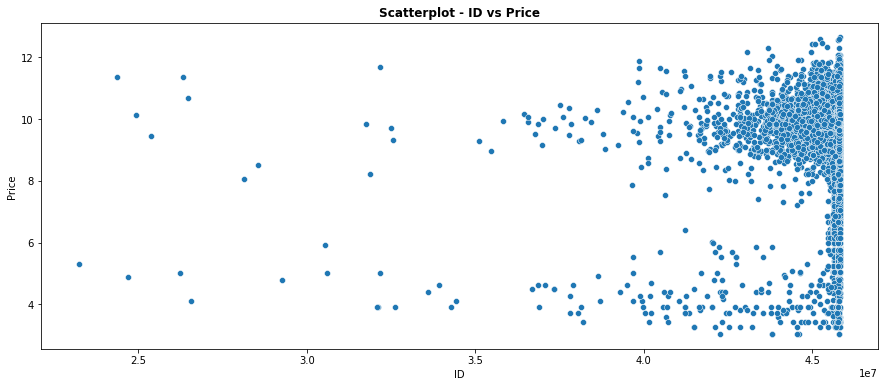

In [21]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='ID', y='Price', data=train_df);
plt.title("Scatterplot - ID vs Price", fontweight='bold');

In [22]:
train_df['id0'] = train_df['ID'].apply(lambda x: str(x)[0])
train_df['id1'] = train_df['ID'].apply(lambda x: str(x)[1])
train_df['id2'] = train_df['ID'].apply(lambda x: str(x)[2])
train_df['id3'] = train_df['ID'].apply(lambda x: str(x)[3])
train_df['id4'] = train_df['ID'].apply(lambda x: str(x)[4])
train_df['id5'] = train_df['ID'].apply(lambda x: str(x)[5])
train_df['id6'] = train_df['ID'].apply(lambda x: str(x)[6])
train_df['id7'] = train_df['ID'].apply(lambda x: str(x)[7])

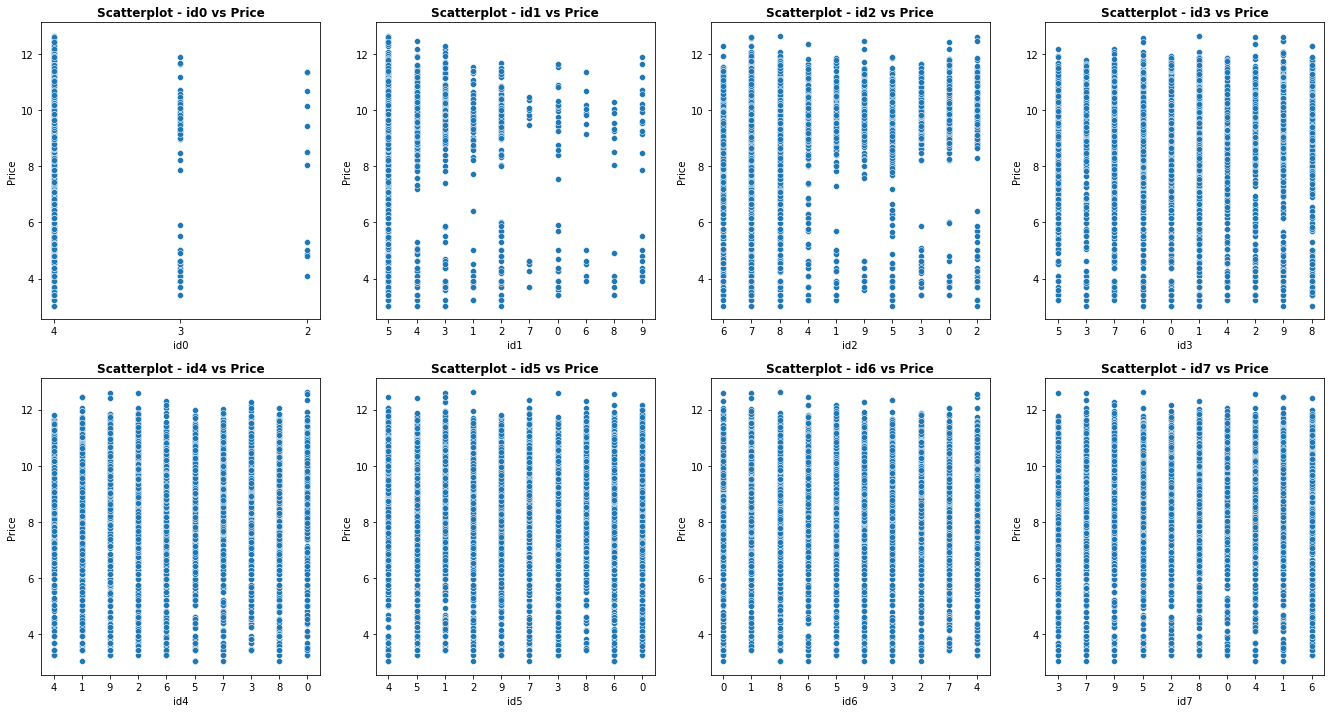

In [23]:
_, ax = plt.subplots(2, 4, figsize=(23, 12))
sns.scatterplot(x='id0', y='Price', data=train_df, ax=ax[0][0]);
sns.scatterplot(x='id1', y='Price', data=train_df, ax=ax[0][1]);
sns.scatterplot(x='id2', y='Price', data=train_df, ax=ax[0][2]);
sns.scatterplot(x='id3', y='Price', data=train_df, ax=ax[0][3]);
sns.scatterplot(x='id4', y='Price', data=train_df, ax=ax[1][0]);
sns.scatterplot(x='id5', y='Price', data=train_df, ax=ax[1][1]);
sns.scatterplot(x='id6', y='Price', data=train_df, ax=ax[1][2]);
sns.scatterplot(x='id7', y='Price', data=train_df, ax=ax[1][3]);
ax[0][0].set_title("Scatterplot - id0 vs Price", fontweight='bold');
ax[0][1].set_title("Scatterplot - id1 vs Price", fontweight='bold');
ax[0][2].set_title("Scatterplot - id2 vs Price", fontweight='bold');
ax[0][3].set_title("Scatterplot - id3 vs Price", fontweight='bold');
ax[1][0].set_title("Scatterplot - id4 vs Price", fontweight='bold');
ax[1][1].set_title("Scatterplot - id5 vs Price", fontweight='bold');
ax[1][2].set_title("Scatterplot - id6 vs Price", fontweight='bold');
ax[1][3].set_title("Scatterplot - id7 vs Price", fontweight='bold');

### Levy

In [24]:
train_df['Levy'] = train_df['Levy'].apply(lambda x: 0 if x=='-' else int(x))

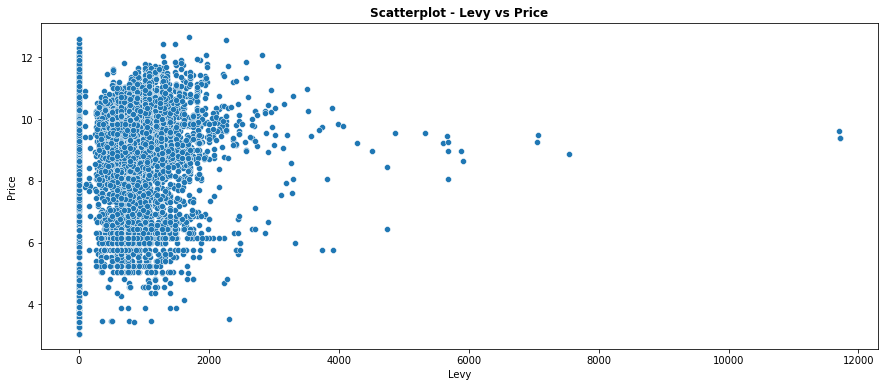

In [25]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Levy', y='Price', data=train_df);
plt.title("Scatterplot - Levy vs Price", fontweight='bold');

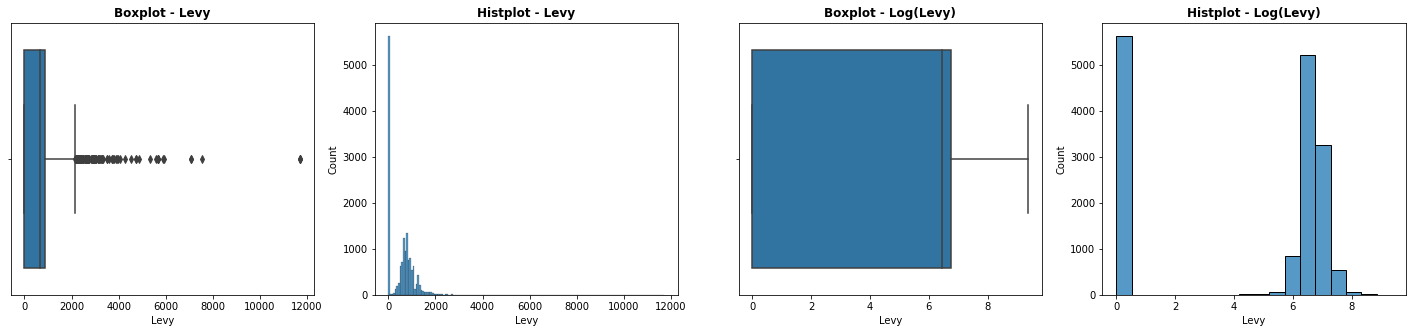

In [26]:
x1 = train_df['Levy']
x2 = np.log1p(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title("Boxplot - Levy", fontweight='bold');
ax[1].set_title("Histplot - Levy", fontweight='bold');
ax[2].set_title("Boxplot - Log(Levy)", fontweight='bold');
ax[3].set_title("Histplot - Log(Levy)", fontweight='bold');

In [27]:
# Remove outlier in train data
train_df = train_df[train_df['Levy']<7000].copy()
print(f"train_df: {train_df.shape}")

train_df: (15656, 26)


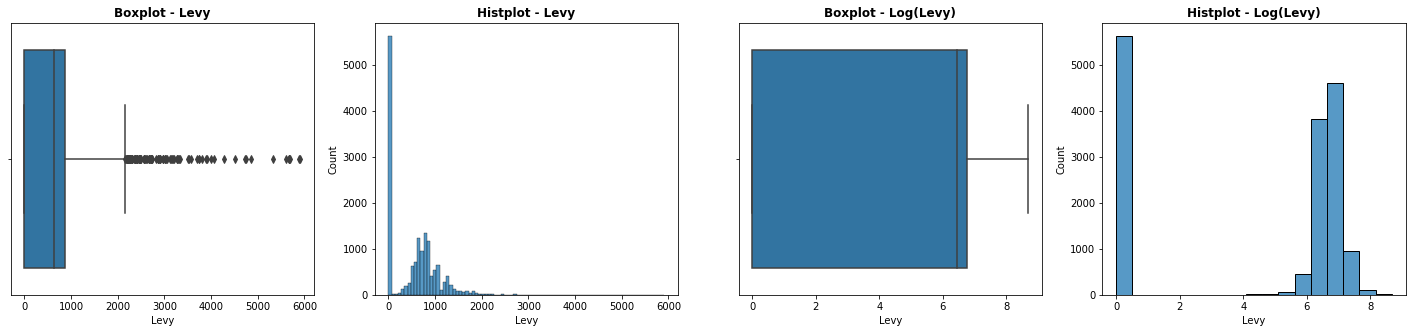

In [28]:
x1 = train_df['Levy']
x2 = np.log1p(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title("Boxplot - Levy", fontweight='bold');
ax[1].set_title("Histplot - Levy", fontweight='bold');
ax[2].set_title("Boxplot - Log(Levy)", fontweight='bold');
ax[3].set_title("Histplot - Log(Levy)", fontweight='bold');

In [29]:
train_df['Levy'] = np.log1p(train_df['Levy'])

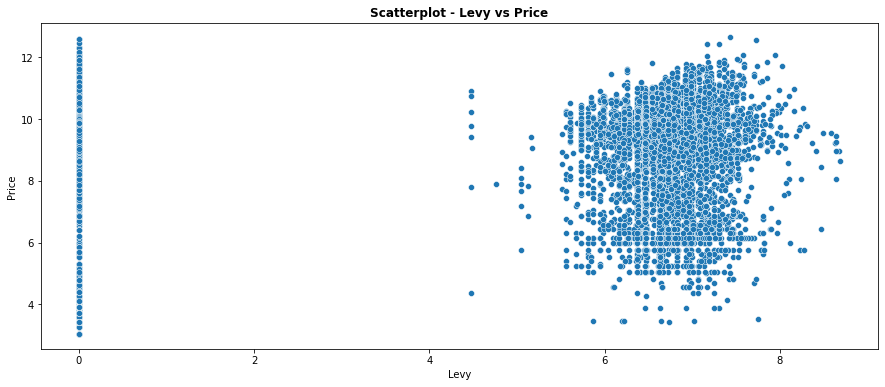

In [30]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Levy', y='Price', data=train_df);
plt.title("Scatterplot - Levy vs Price", fontweight='bold');

### Manufacturer

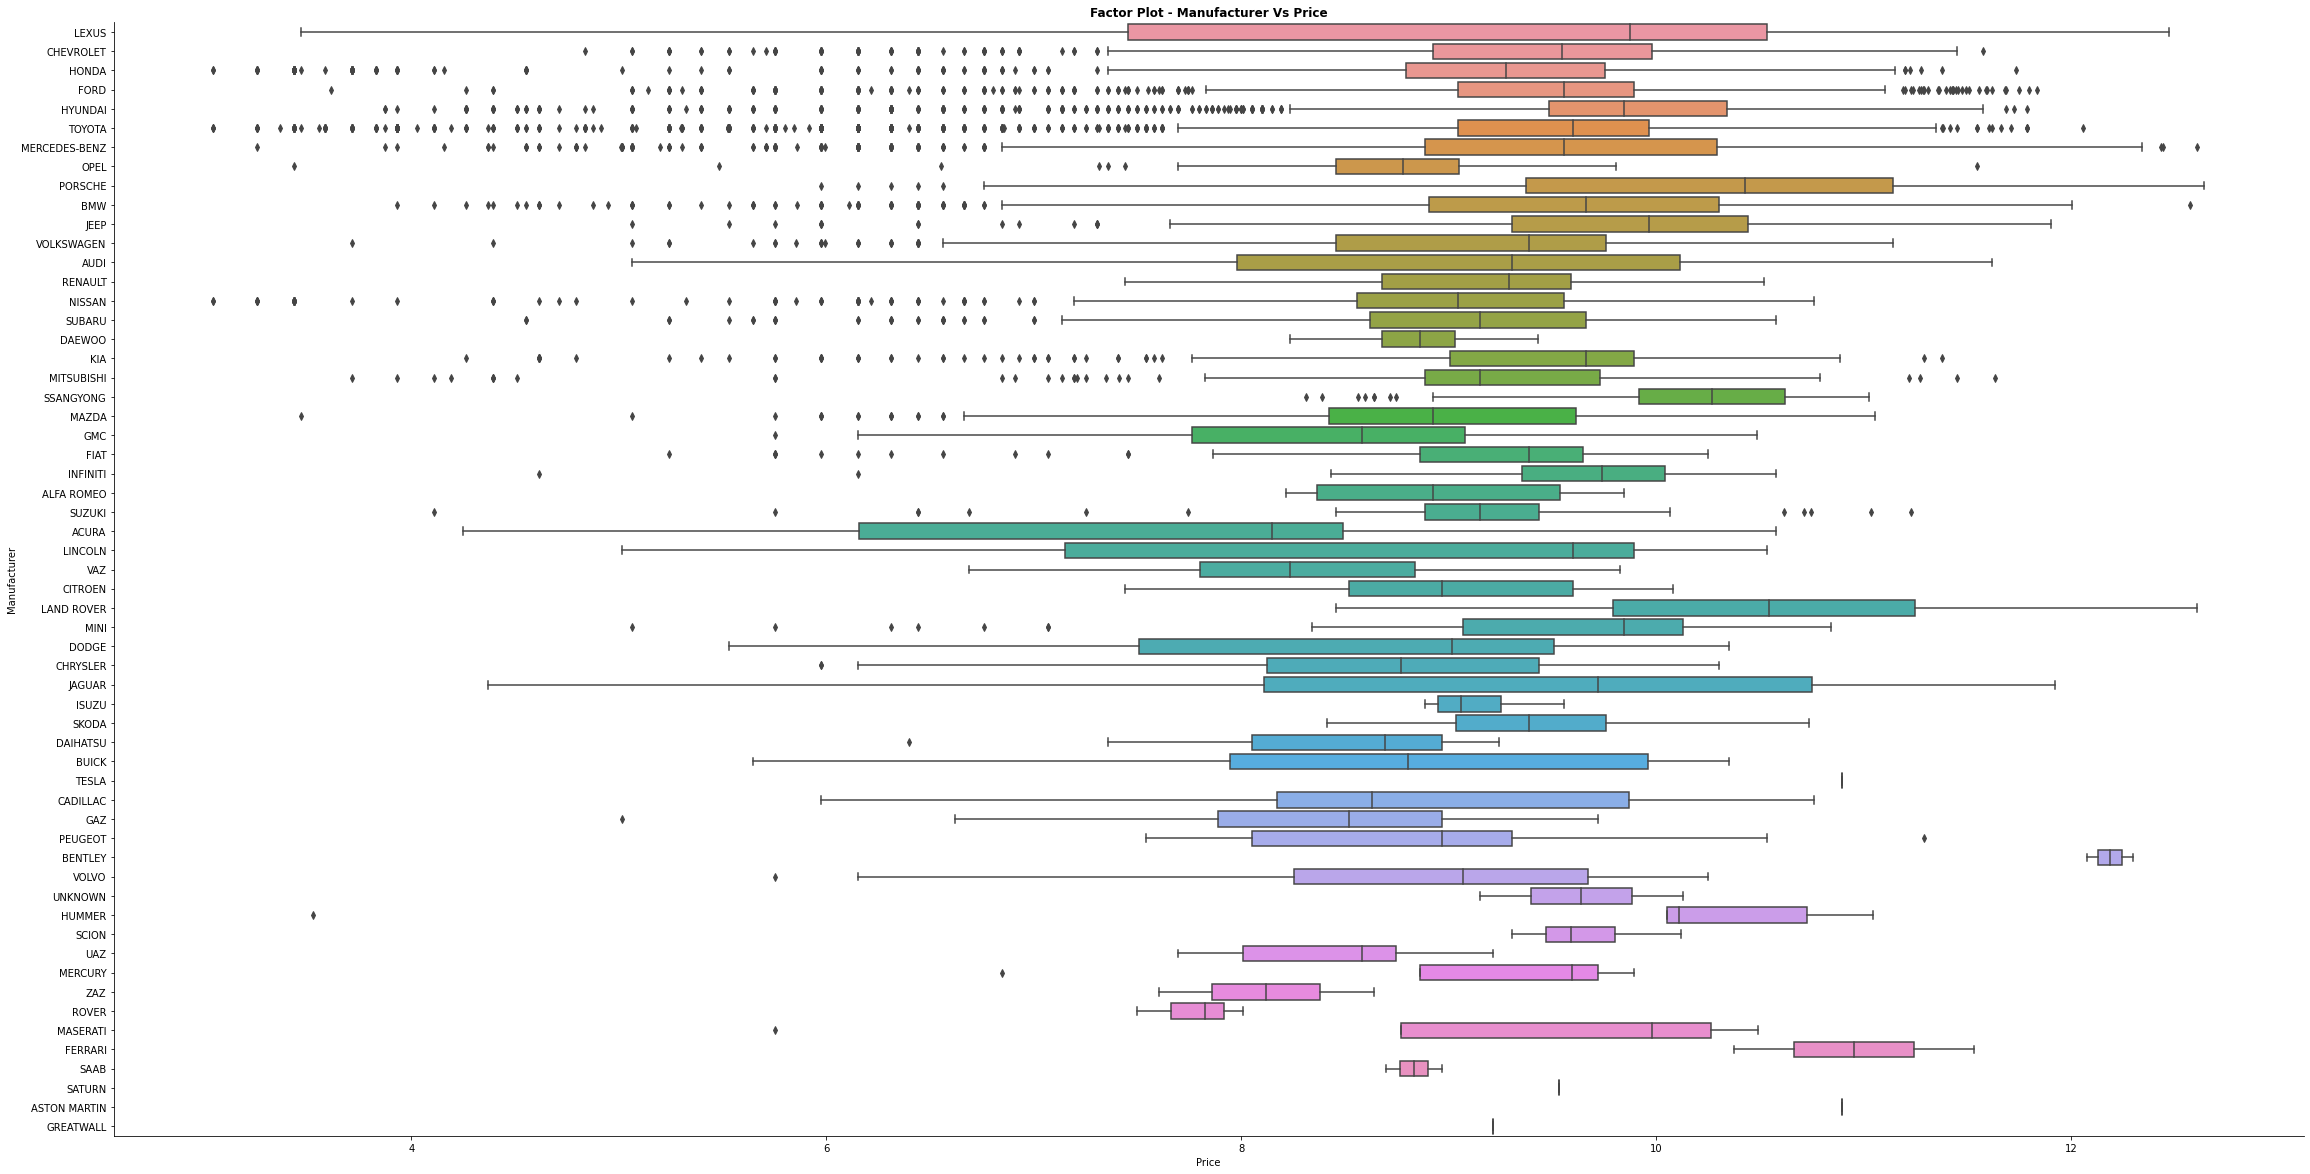

In [31]:
sns.catplot(x="Price", y="Manufacturer", data=train_df, kind="box", height=16, aspect=2)
plt.title('Factor Plot - Manufacturer Vs Price', fontweight='bold');

In [32]:
# Remove outlier in train data
train_df = train_df[~((train_df['Manufacturer']=='OPEL')&(train_df['Price']<6))].copy()
train_df = train_df[~((train_df['Manufacturer']=='OPEL')&(train_df['Price']>11))].copy()
train_df = train_df[~((train_df['Manufacturer']=='INFINITI')&(train_df['Price']<7))].copy()
train_df = train_df[~((train_df['Manufacturer']=='SUZUKI')&(train_df['Price']<5))].copy()
train_df = train_df[~((train_df['Manufacturer']=='GAZ')&(train_df['Price']<6))].copy()
train_df = train_df[~((train_df['Manufacturer']=='HUMMER')&(train_df['Price']<4))].copy()
train_df = train_df[~((train_df['Manufacturer']=='MASERATI')&(train_df['Price']<6))].copy()
train_df = train_df[~((train_df['Manufacturer']=='MERCURY')&(train_df['Price']<8))].copy()
train_df = train_df[~((train_df['Manufacturer']=='DAIHATSU')&(train_df['Price']<7))].copy()
print(f"train_df: {train_df.shape}")

train_df: (15645, 26)


In [33]:
train_df['Manufacturer_vowels'] = train_df['Manufacturer'].apply(lambda x: len([v for v in x if v in ['A','E','I','O','U']]))
train_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Airbags,id0,id1,id2,id3,id4,id5,id6,id7,Manufacturer_vowels
0,45654403,9.497697,7.244228,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,...,12,4,5,6,5,4,4,0,3,2
1,44731507,9.718482,6.926577,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,...,8,4,4,7,3,1,5,0,7,3
2,45774419,9.044050,0.000000,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,...,2,4,5,7,7,4,4,1,9,2
3,45769185,8.190909,6.760415,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,...,0,4,5,7,6,9,1,8,5,1
4,45809263,9.369649,6.102559,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,...,4,4,5,8,0,9,2,6,3,2


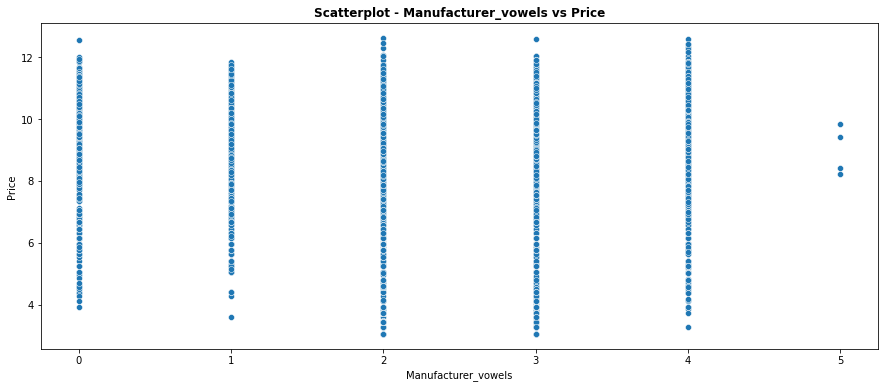

In [34]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Manufacturer_vowels', y='Price', data=train_df);
plt.title("Scatterplot - Manufacturer_vowels vs Price", fontweight='bold');

### Prod. year

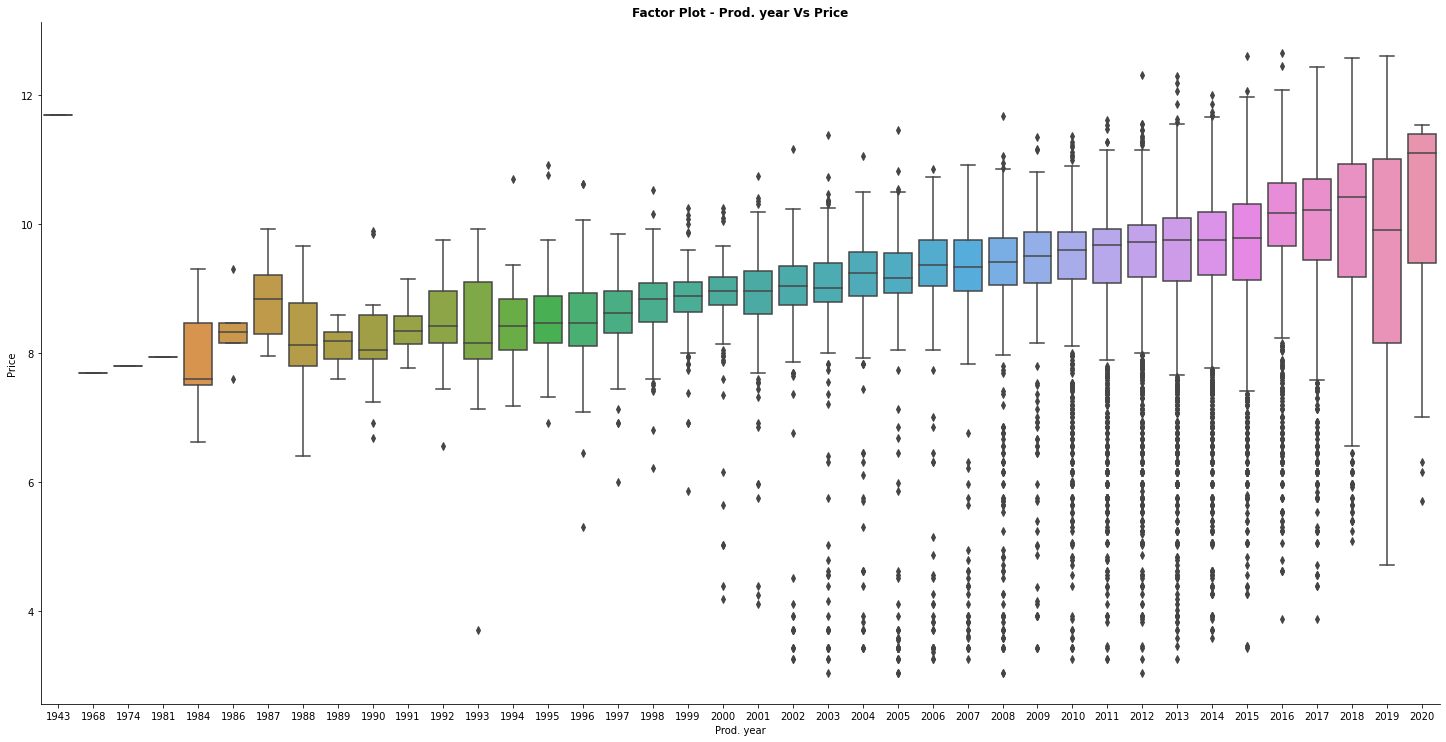

In [35]:
sns.catplot(x="Prod. year", y="Price", data=train_df, kind="box", height=10, aspect=2)
plt.title('Factor Plot - Prod. year Vs Price', fontweight='bold');

In [36]:
# Remove outlier in train data
train_df = train_df[~((train_df['Prod. year']==1993)&(train_df['Price']<4))].copy()
print(f"train_df: {train_df.shape}")

train_df: (15644, 27)


In [37]:
train_df['Prod. Year Group'] = train_df['Prod. year'].apply(lambda x: 0 if x<=1990 else 1 if x>1990 and x<=2000 else 2 if x>2000 and x<=2010 else 3)

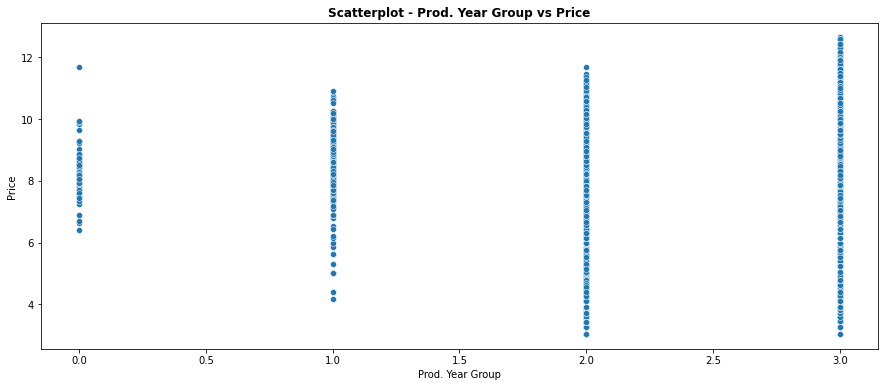

In [38]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Prod. Year Group', y='Price', data=train_df);
plt.title("Scatterplot - Prod. Year Group vs Price", fontweight='bold');

### Category

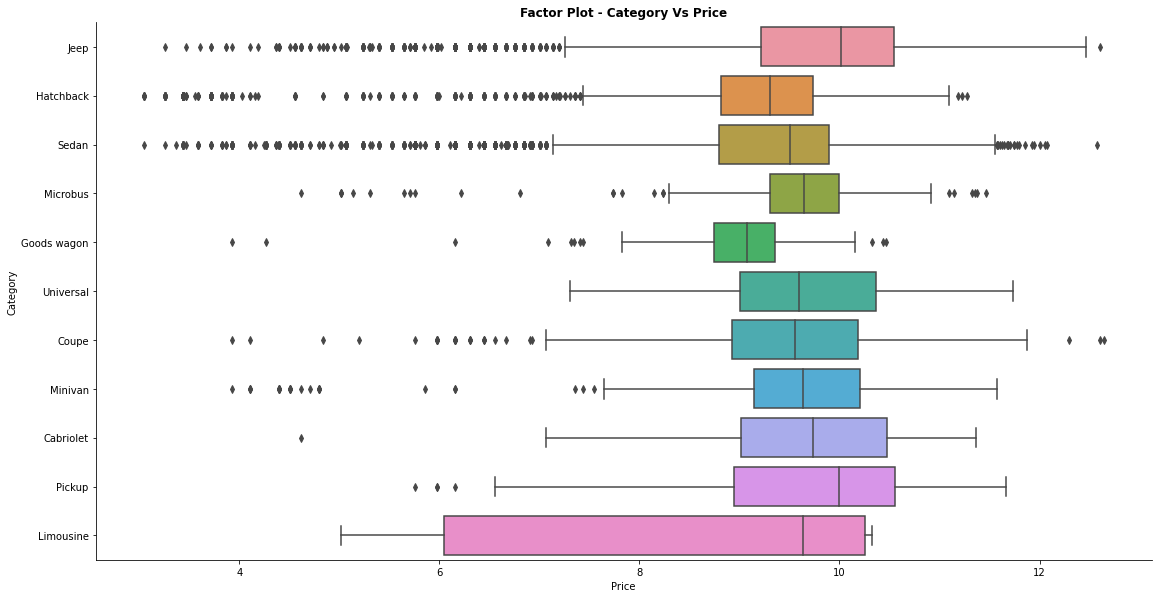

In [39]:
sns.catplot(x="Price", y="Category", data=train_df, kind="box", height=8, aspect=2)
plt.title('Factor Plot - Category Vs Price', fontweight='bold');

In [40]:
# Remove outlier in train data
train_df = train_df[~((train_df['Category']=='Cabriolet')&(train_df['Price']<6))].copy()
train_df = train_df[~((train_df['Category']=='Goods wagon')&(train_df['Price']<5))].copy()
print(f"train_df: {train_df.shape}")

train_df: (15641, 28)


### Leather Interior

In [41]:
train_df['Leather interior'] = train_df['Leather interior'].apply(lambda x: 1 if x=='Yes' else 0)

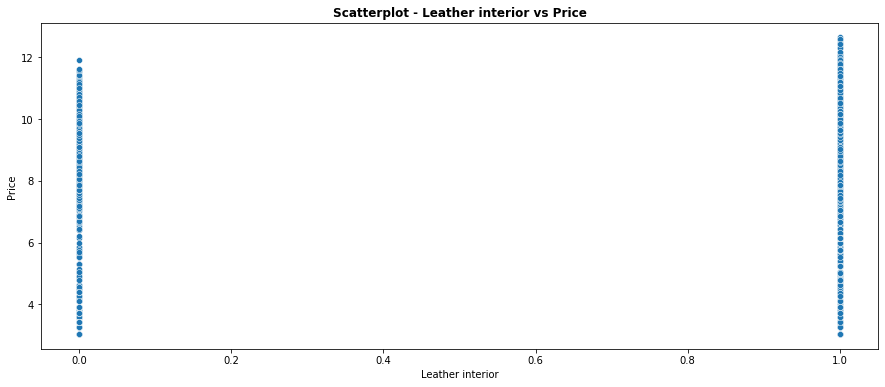

In [42]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Leather interior', y='Price', data=train_df);
plt.title("Scatterplot - Leather interior vs Price", fontweight='bold');

### Fuel Type

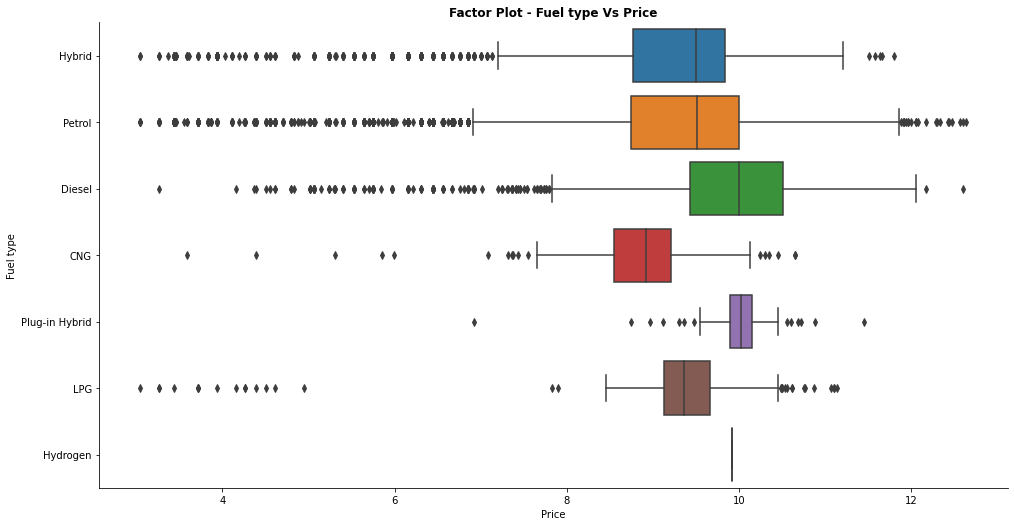

In [43]:
sns.catplot(x="Price", y="Fuel type", data=train_df, kind="box", height=7, aspect=2)
plt.title('Factor Plot - Fuel type Vs Price', fontweight='bold');

In [44]:
# Remove outlier in train data
train_df = train_df[~((train_df['Fuel type']=='Plug-in Hybrid')&(train_df['Price']<8))].copy()
print(f"train_df: {train_df.shape}")

train_df: (15640, 28)


In [45]:
train_df['Fuel Tank Petrol'] = train_df['Fuel type'].apply(lambda x: 1 if x=='Petrol' else 0)
train_df['Fuel Tank Diesel'] = train_df['Fuel type'].apply(lambda x: 1 if x=='Diesel' else 0)
train_df['Fuel Tank Gas'] = train_df['Fuel type'].apply(lambda x: 1 if x in ['LPG','CNG','Plug-in Hybrid'] else 0)
train_df['Hybrid_Car'] = train_df['Fuel type'].apply(lambda x: 1 if 'Hybrid' in x else 0)

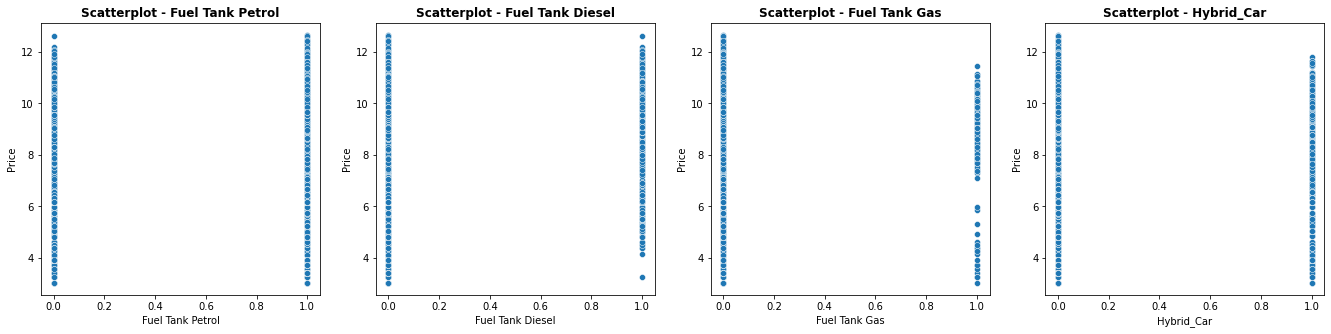

In [46]:
_, ax = plt.subplots(1, 4, figsize=(23, 5))
sns.scatterplot(x='Fuel Tank Petrol', y='Price', data=train_df, ax=ax[0]);
sns.scatterplot(x='Fuel Tank Diesel', y='Price', data=train_df, ax=ax[1]);
sns.scatterplot(x='Fuel Tank Gas', y='Price', data=train_df, ax=ax[2]);
sns.scatterplot(x='Hybrid_Car', y='Price', data=train_df, ax=ax[3]);
ax[0].set_title("Scatterplot - Fuel Tank Petrol", fontweight='bold');
ax[1].set_title("Scatterplot - Fuel Tank Diesel", fontweight='bold');
ax[2].set_title("Scatterplot - Fuel Tank Gas", fontweight='bold');
ax[3].set_title("Scatterplot - Hybrid_Car", fontweight='bold');

### Engine Volume

In [47]:
train_df['Turbo_Engine'] = train_df['Engine volume'].apply(lambda x: 1 if 'Turbo' in x else 0)
train_df['Engine volume'] = train_df['Engine volume'].apply(lambda x: float(x.replace(' Turbo','')))

In [48]:
train_df['Engine volume'] = train_df['Engine volume'].apply(lambda x: np.nan if x==0 else x)

agg_cols = ['Manufacturer','Category']
agg_df = train_df[~train_df.duplicated(subset=['Manufacturer','Category','Engine volume'], keep='first')].copy()
agg_df = agg_df.groupby(agg_cols).agg({'Engine volume':'mean'}).reset_index()
agg_df.fillna(0, inplace=True)
agg_df = agg_df.rename(columns={'Engine volume':'Mean Engine volume'})
agg_df['Mean Engine volume'] = np.round(agg_df['Mean Engine volume'], 1)

train_df = pd.merge(train_df, agg_df, on=agg_cols, how='left', sort=False)
train_df['Engine volume'] = train_df.apply(lambda x: x['Mean Engine volume'] if pd.isnull(x['Engine volume']) else x['Engine volume'], axis=1)
train_df.drop(['Mean Engine volume'], axis=1, inplace=True)
train_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,id5,id6,id7,Manufacturer_vowels,Prod. Year Group,Fuel Tank Petrol,Fuel Tank Diesel,Fuel Tank Gas,Hybrid_Car,Turbo_Engine
0,45654403,9.497697,7.244228,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,...,4,0,3,2,2,0,0,0,1,0
1,44731507,9.718482,6.926577,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,...,5,0,7,3,3,1,0,0,0,0
2,45774419,9.044050,0.000000,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,...,4,1,9,2,2,1,0,0,0,0
3,45769185,8.190909,6.760415,FORD,Escape,2011,Jeep,1,Hybrid,2.5,...,1,8,5,1,3,0,0,0,1,0
4,45809263,9.369649,6.102559,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,...,2,6,3,2,3,1,0,0,0,0


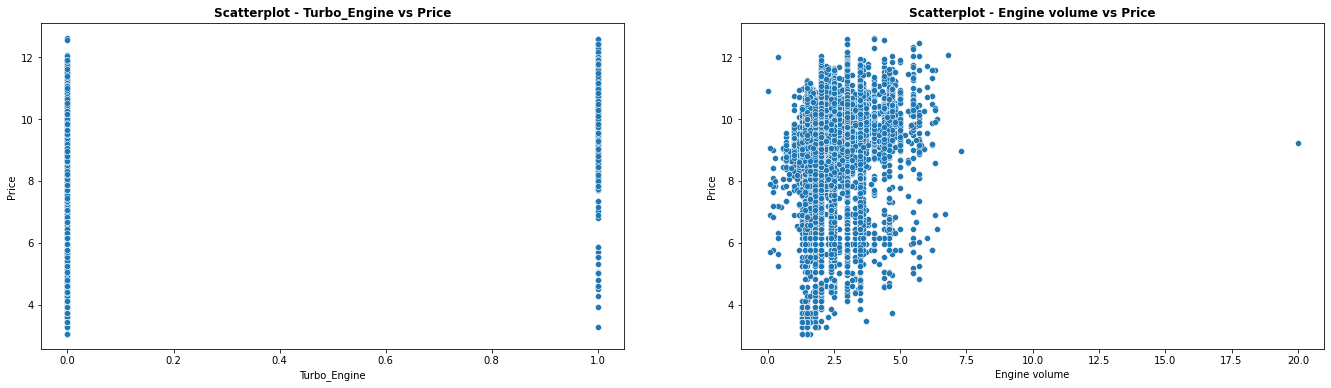

In [49]:
_, ax = plt.subplots(1, 2, figsize=(23, 6))
sns.scatterplot(x='Turbo_Engine', y='Price', data=train_df, ax=ax[0]);
sns.scatterplot(x='Engine volume', y='Price', data=train_df, ax=ax[1]);
ax[0].set_title("Scatterplot - Turbo_Engine vs Price", fontweight='bold');
ax[1].set_title("Scatterplot - Engine volume vs Price", fontweight='bold');

In [50]:
# Remove outlier in train data
train_df = train_df[train_df['Engine volume']<10].copy()
print(f"train_df: {train_df.shape}")

train_df: (15639, 33)


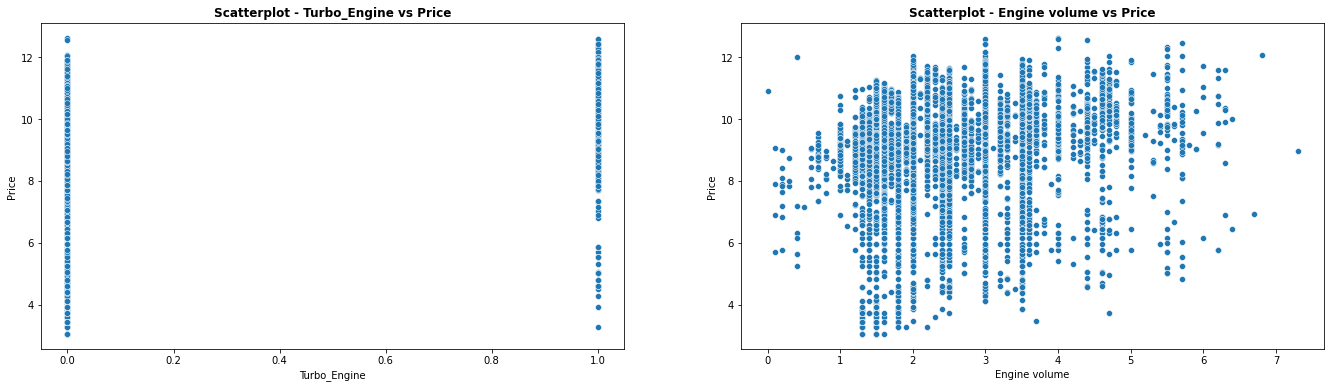

In [51]:
_, ax = plt.subplots(1, 2, figsize=(23, 6))
sns.scatterplot(x='Turbo_Engine', y='Price', data=train_df, ax=ax[0]);
sns.scatterplot(x='Engine volume', y='Price', data=train_df, ax=ax[1]);
ax[0].set_title("Scatterplot - Turbo_Engine vs Price", fontweight='bold');
ax[1].set_title("Scatterplot - Engine volume vs Price", fontweight='bold');

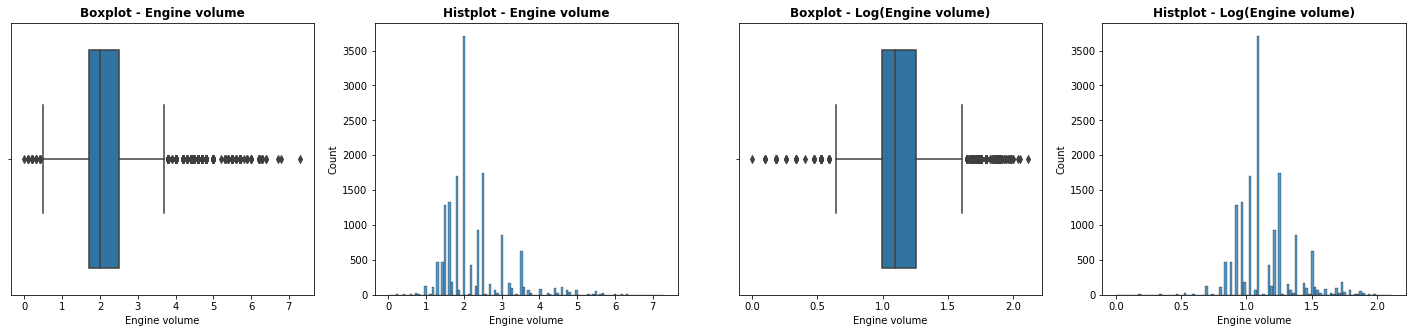

In [52]:
x1 = train_df['Engine volume']
x2 = np.log1p(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title("Boxplot - Engine volume", fontweight='bold');
ax[1].set_title("Histplot - Engine volume", fontweight='bold');
ax[2].set_title("Boxplot - Log(Engine volume)", fontweight='bold');
ax[3].set_title("Histplot - Log(Engine volume)", fontweight='bold');

In [53]:
train_df['Per_cylinder_capacity'] = train_df.apply(lambda x: round((x['Engine volume'] * 1000)/x['Cylinders']), axis=1)

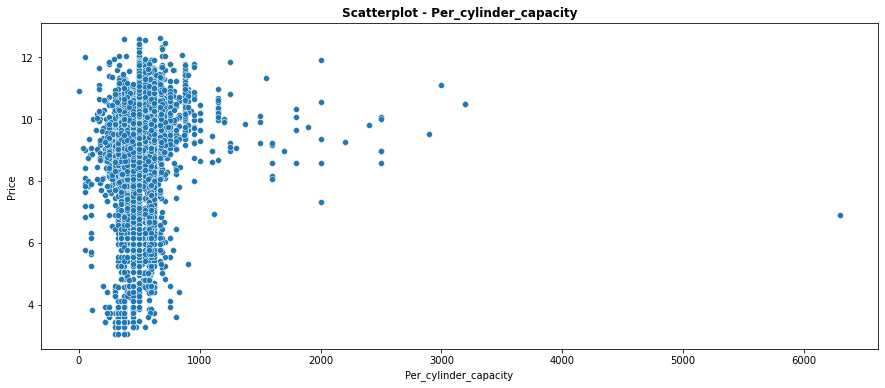

In [54]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Per_cylinder_capacity', y='Price', data=train_df)
plt.title("Scatterplot - Per_cylinder_capacity", fontweight='bold');

In [55]:
train_df = train_df[train_df['Per_cylinder_capacity']<5000].copy()
print(f"train_df: {train_df.shape}")

train_df: (15638, 34)


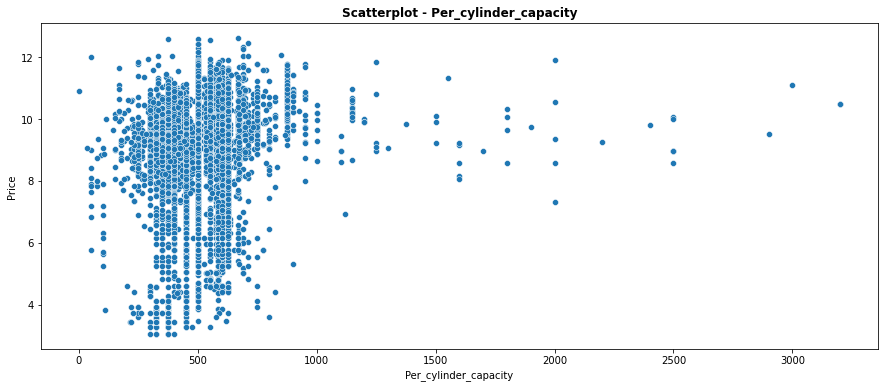

In [56]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Per_cylinder_capacity', y='Price', data=train_df)
plt.title("Scatterplot - Per_cylinder_capacity", fontweight='bold');

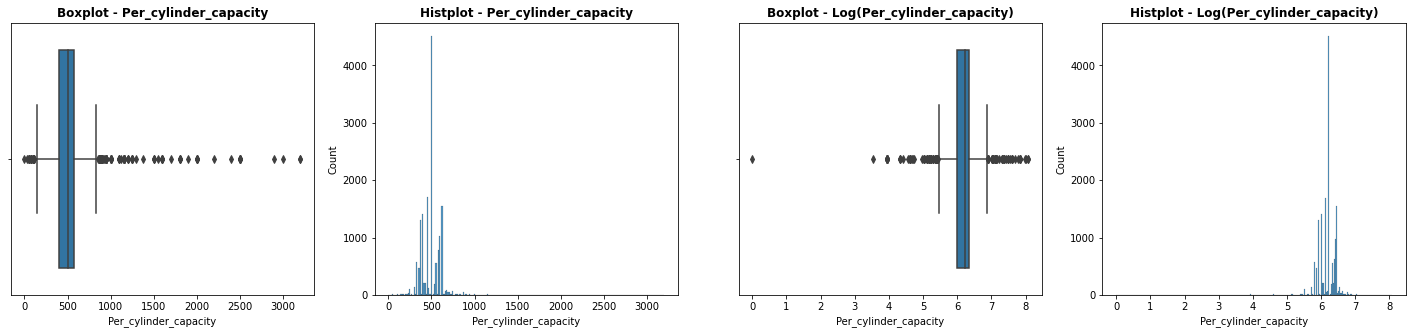

In [57]:
x1 = train_df['Per_cylinder_capacity']
x2 = np.log1p(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title("Boxplot - Per_cylinder_capacity", fontweight='bold');
ax[1].set_title("Histplot - Per_cylinder_capacity", fontweight='bold');
ax[2].set_title("Boxplot - Log(Per_cylinder_capacity)", fontweight='bold');
ax[3].set_title("Histplot - Log(Per_cylinder_capacity)", fontweight='bold');

In [58]:
train_df = train_df[np.log1p(train_df['Per_cylinder_capacity'])>2].copy()

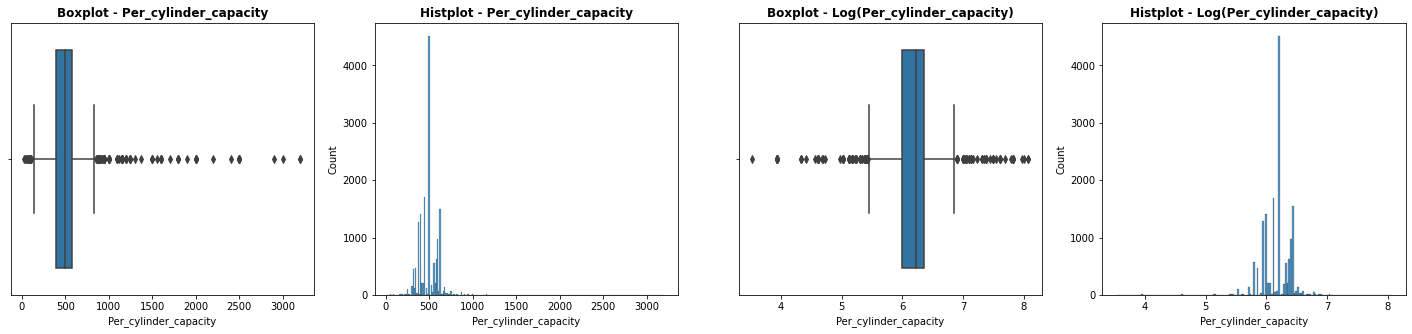

In [59]:
x1 = train_df['Per_cylinder_capacity']
x2 = np.log1p(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title("Boxplot - Per_cylinder_capacity", fontweight='bold');
ax[1].set_title("Histplot - Per_cylinder_capacity", fontweight='bold');
ax[2].set_title("Boxplot - Log(Per_cylinder_capacity)", fontweight='bold');
ax[3].set_title("Histplot - Log(Per_cylinder_capacity)", fontweight='bold');

In [60]:
train_df['Engine volume'] = np.log1p(train_df['Engine volume'])
train_df['Per_cylinder_capacity'] = np.log1p(train_df['Per_cylinder_capacity'])

### Mileage

In [61]:
train_df['Mileage'] = train_df['Mileage'].apply(lambda x: float(x.replace(' km','')))
train_df['Mileage'] = train_df['Mileage'].apply(lambda x: np.nan if x==0 else x)

agg_cols = ['Manufacturer','Category']
agg_df = train_df.groupby(agg_cols).agg({'Mileage':'mean'}).reset_index()
agg_df.fillna(0, inplace=True)
agg_df = agg_df.rename(columns={'Mileage':'Mean Mileage'})
agg_df['Mean Mileage'] = np.round(agg_df['Mean Mileage'], 1)

train_df = pd.merge(train_df, agg_df, on=agg_cols, how='left', sort=False)
train_df['Mileage'] = train_df.apply(lambda x: x['Mean Mileage'] if pd.isnull(x['Mileage']) else x['Mileage'], axis=1)
train_df['Mileage'] = train_df['Mileage'] * 0.621371
train_df.drop(['Mean Mileage'], axis=1, inplace=True)
train_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,id6,id7,Manufacturer_vowels,Prod. Year Group,Fuel Tank Petrol,Fuel Tank Diesel,Fuel Tank Gas,Hybrid_Car,Turbo_Engine,Per_cylinder_capacity
0,45654403,9.497697,7.244228,LEXUS,RX 450,2010,Jeep,1,Hybrid,1.504077,...,0,3,2,2,0,0,0,1,0,6.369901
1,44731507,9.718482,6.926577,CHEVROLET,Equinox,2011,Jeep,0,Petrol,1.386294,...,0,7,3,3,1,0,0,0,0,6.216606
2,45774419,9.044050,0.000000,HONDA,FIT,2006,Hatchback,0,Petrol,0.832909,...,1,9,2,2,1,0,0,0,0,5.786897
3,45769185,8.190909,6.760415,FORD,Escape,2011,Jeep,1,Hybrid,1.252763,...,8,5,1,3,0,0,0,1,0,6.439350
4,45809263,9.369649,6.102559,HONDA,FIT,2014,Hatchback,1,Petrol,0.832909,...,6,3,2,3,1,0,0,0,0,5.786897


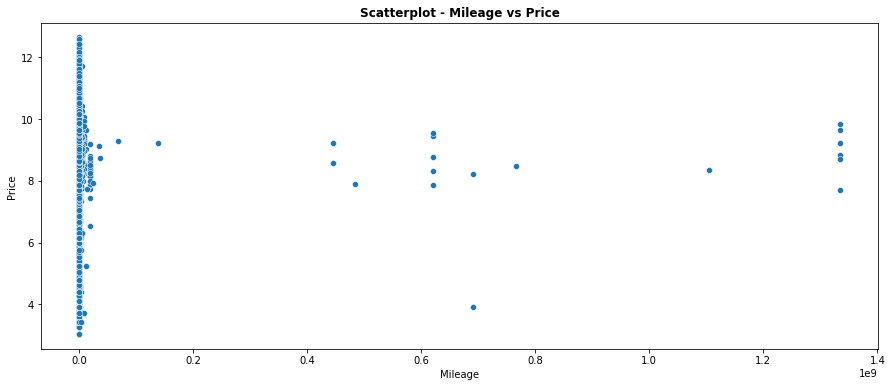

In [62]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Mileage', y='Price', data=train_df);
plt.title("Scatterplot - Mileage vs Price", fontweight='bold');

In [63]:
train_df['Mileage'] = np.log1p(np.cbrt(train_df['Mileage']))
train_df = train_df[train_df['Mileage']>0].copy()

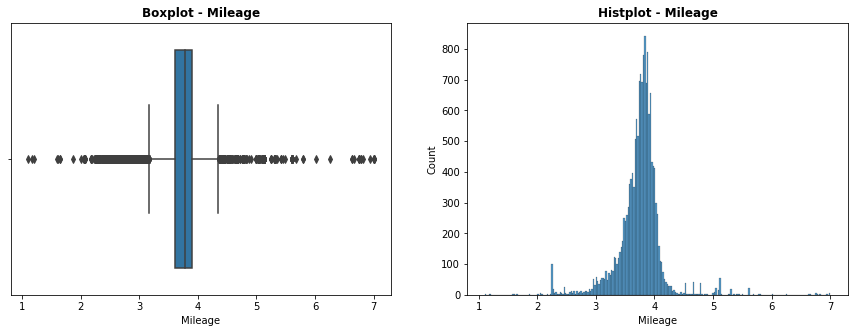

In [64]:
x1 = train_df['Mileage']

_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
ax[0].set_title("Boxplot - Mileage", fontweight='bold');
ax[1].set_title("Histplot - Mileage", fontweight='bold');

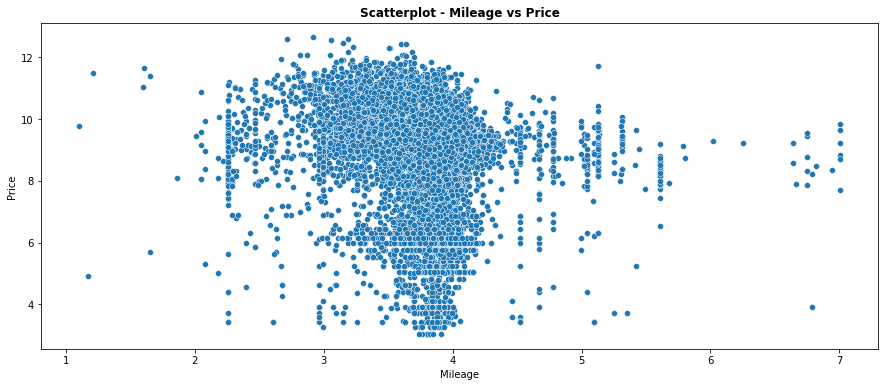

In [65]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Mileage', y='Price', data=train_df);
plt.title("Scatterplot - Mileage vs Price", fontweight='bold');

In [66]:
train_df['Age-of-car'] = train_df['Prod. year'].apply(lambda x: 2021 - x)

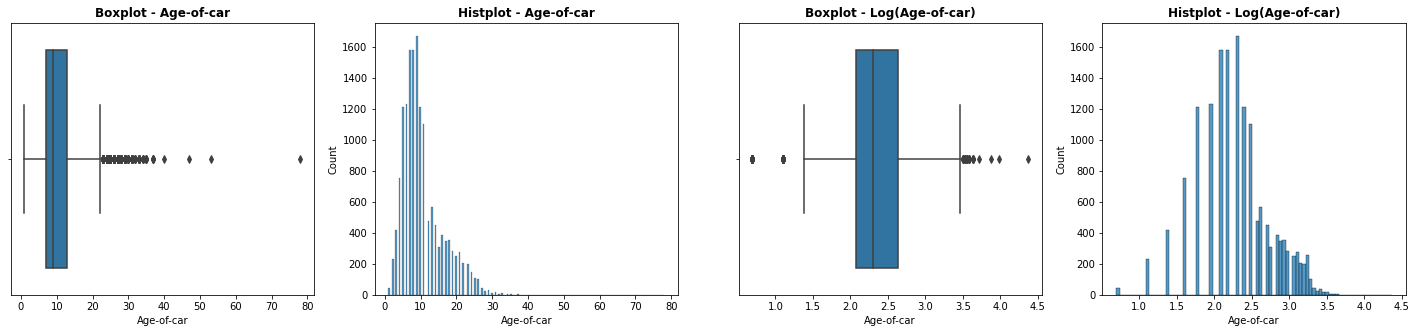

In [67]:
x1 = train_df['Age-of-car']
x2 = np.log1p(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title("Boxplot - Age-of-car", fontweight='bold');
ax[1].set_title("Histplot - Age-of-car", fontweight='bold');
ax[2].set_title("Boxplot - Log(Age-of-car)", fontweight='bold');
ax[3].set_title("Histplot - Log(Age-of-car)", fontweight='bold');

In [68]:
train_df = train_df[train_df['Age-of-car']<60].copy()
train_df['Age-of-car'] = np.log1p(train_df['Age-of-car'])

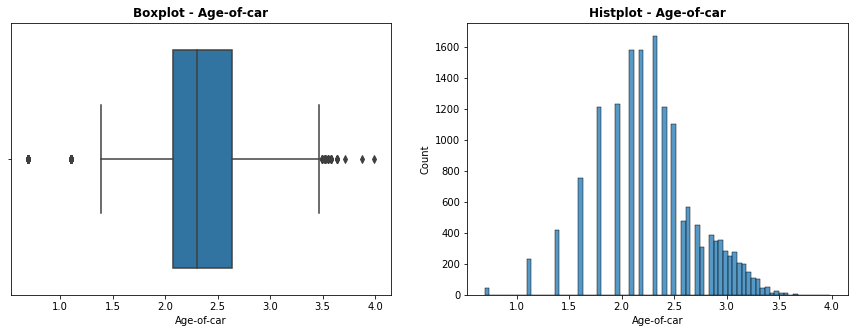

In [69]:
x1 = train_df['Age-of-car']

_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
ax[0].set_title("Boxplot - Age-of-car", fontweight='bold');
ax[1].set_title("Histplot - Age-of-car", fontweight='bold');

In [70]:
train_df['Mileage_per_yr'] = train_df['Mileage'] / train_df['Age-of-car']

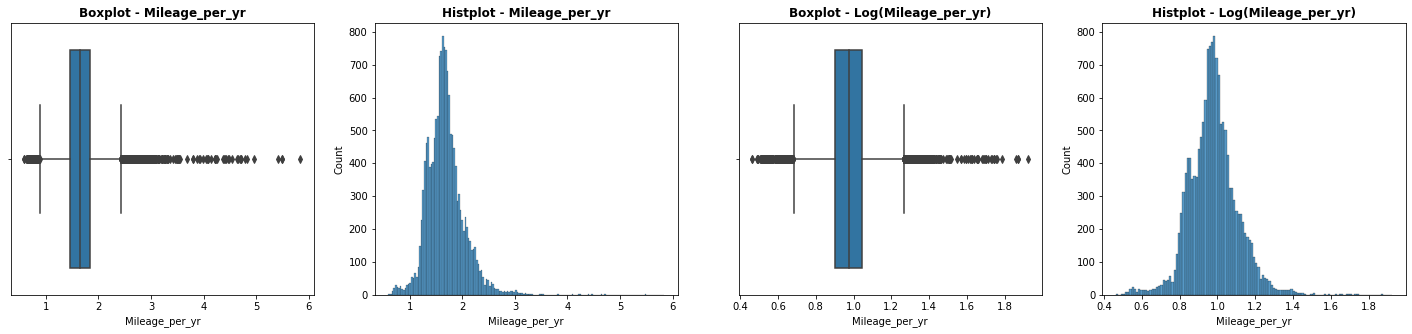

In [71]:
x1 = train_df['Mileage_per_yr']
x2 = np.log1p(x1)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
sns.boxplot(x=x2, ax=ax[2]);
sns.histplot(x=x2, ax=ax[3]);
ax[0].set_title("Boxplot - Mileage_per_yr", fontweight='bold');
ax[1].set_title("Histplot - Mileage_per_yr", fontweight='bold');
ax[2].set_title("Boxplot - Log(Mileage_per_yr)", fontweight='bold');
ax[3].set_title("Histplot - Log(Mileage_per_yr)", fontweight='bold');

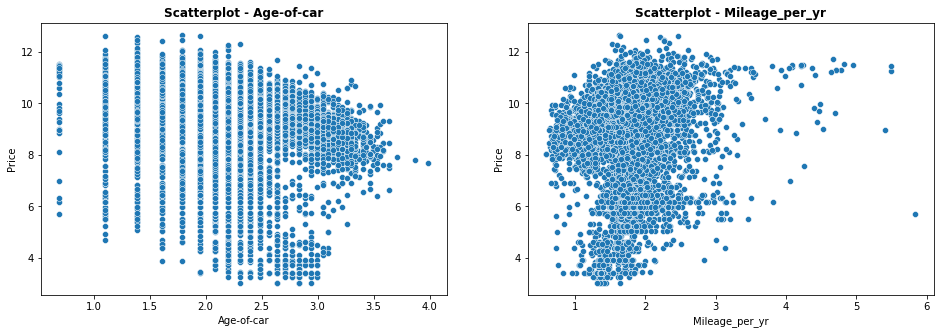

In [72]:
_, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.scatterplot(x='Age-of-car', y='Price', data=train_df, ax=ax[0]);
sns.scatterplot(x='Mileage_per_yr', y='Price', data=train_df, ax=ax[1]);
ax[0].set_title("Scatterplot - Age-of-car", fontweight='bold');
ax[1].set_title("Scatterplot - Mileage_per_yr", fontweight='bold');

### Cylinders

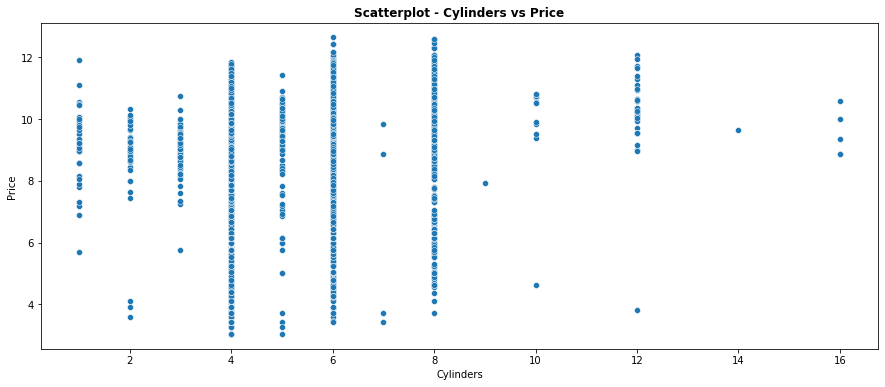

In [73]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Cylinders', y='Price', data=train_df);
plt.title("Scatterplot - Cylinders vs Price", fontweight='bold');

In [74]:
train_df = train_df[~((train_df['Cylinders']==10)&(train_df['Price']<6))].copy()
train_df = train_df[~((train_df['Cylinders']==12)&(train_df['Price']<6))].copy()
print(f"train_df: {train_df.shape}")

train_df: (15633, 36)


### Gear box type

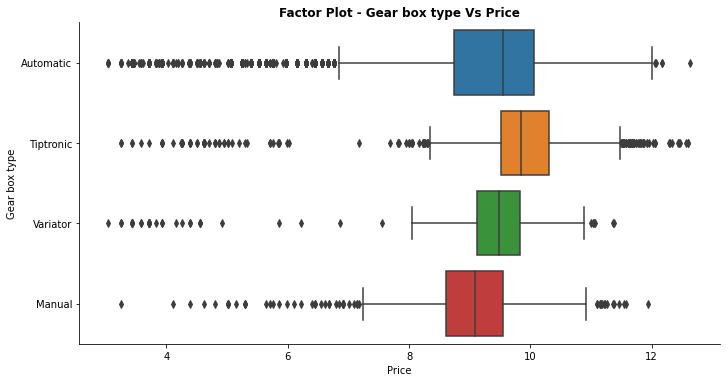

In [75]:
sns.catplot(x="Price", y="Gear box type", data=train_df, kind="box", height=5, aspect=2)
plt.title('Factor Plot - Gear box type Vs Price', fontweight='bold');

In [76]:
train_df['Manual_Gear'] = train_df['Gear box type'].apply(lambda x: 1 if x in ['Manual','Tiptronic'] else 0)
train_df['Automatic_Gear'] = train_df['Gear box type'].apply(lambda x: 1 if x in ['Automatic','Tiptronic','Variator'] else 0)
train_df['Continuous_Gear'] = train_df['Gear box type'].apply(lambda x: 1 if x == 'Variator' else 0)

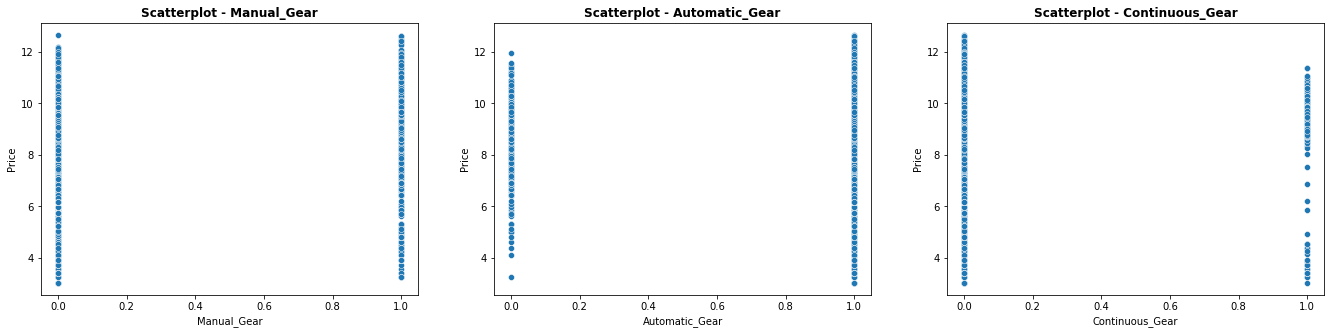

In [77]:
_, ax = plt.subplots(1, 3, figsize=(23, 5))
sns.scatterplot(x='Manual_Gear', y='Price', data=train_df, ax=ax[0]);
sns.scatterplot(x='Automatic_Gear', y='Price', data=train_df, ax=ax[1]);
sns.scatterplot(x='Continuous_Gear', y='Price', data=train_df, ax=ax[2]);
ax[0].set_title("Scatterplot - Manual_Gear", fontweight='bold');
ax[1].set_title("Scatterplot - Automatic_Gear", fontweight='bold');
ax[2].set_title("Scatterplot - Continuous_Gear", fontweight='bold');

### Drive wheels

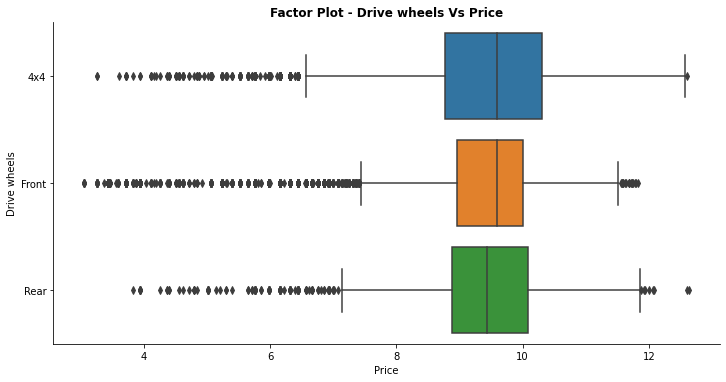

In [78]:
sns.catplot(x="Price", y="Drive wheels", data=train_df, kind="box", height=5, aspect=2)
plt.title('Factor Plot - Drive wheels Vs Price', fontweight='bold');

In [79]:
train_df['Drive wheels Front'] = train_df['Drive wheels'].apply(lambda x: 1 if x in ['Front', '4x4'] else 0)
train_df['Drive wheels Rear'] = train_df['Drive wheels'].apply(lambda x: 1 if x in ['Rear', '4x4'] else 0)

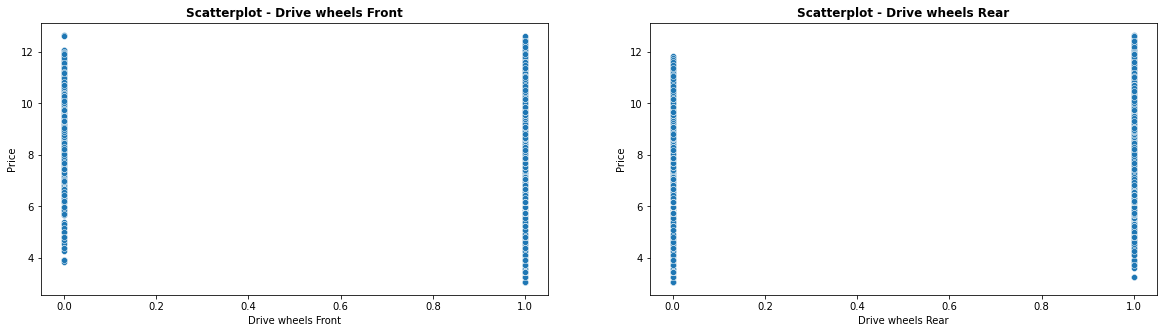

In [80]:
_, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.scatterplot(x='Drive wheels Front', y='Price', data=train_df, ax=ax[0]);
sns.scatterplot(x='Drive wheels Rear', y='Price', data=train_df, ax=ax[1]);
ax[0].set_title("Scatterplot - Drive wheels Front", fontweight='bold');
ax[1].set_title("Scatterplot - Drive wheels Rear", fontweight='bold');

### Doors

In [81]:
train_df['Doors'] = train_df['Doors'].apply(lambda x: 6 if x=='>5' else int(x.split('-')[0]))

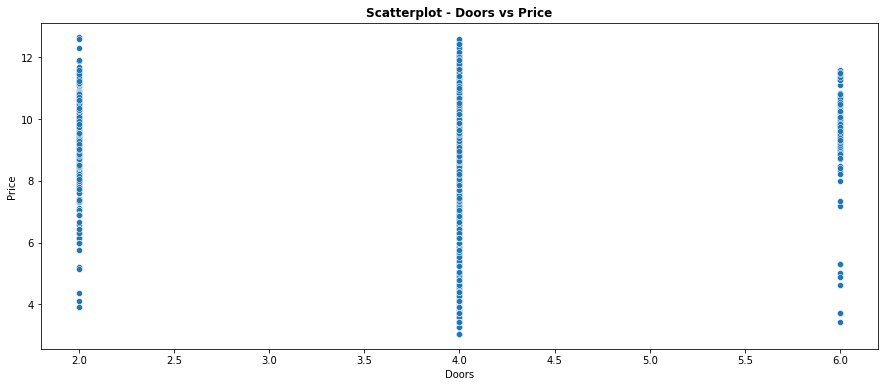

In [82]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Doors', y='Price', data=train_df)
plt.title("Scatterplot - Doors vs Price", fontweight='bold');

### Wheel

In [83]:
train_df['Wheel'] = train_df['Wheel'].apply(lambda x: 1 if x=='Right-hand drive' else 0)

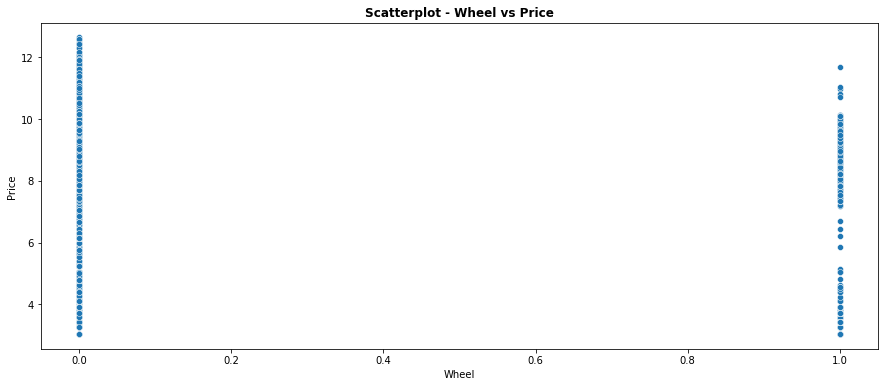

In [84]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Wheel', y='Price', data=train_df)
plt.title("Scatterplot - Wheel vs Price", fontweight='bold');

### Color

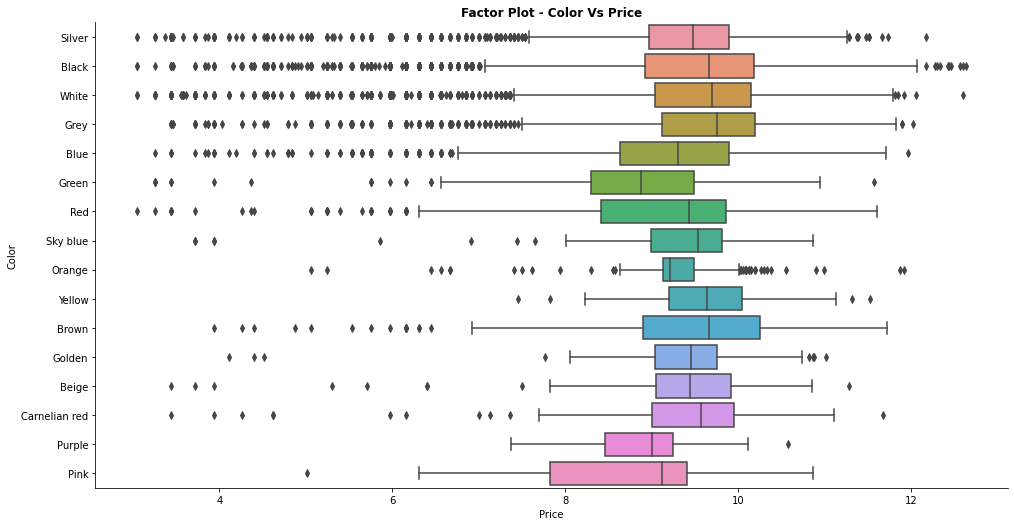

In [85]:
sns.catplot(x="Price", y="Color", data=train_df, kind="box", height=7, aspect=2)
plt.title('Factor Plot - Color Vs Price', fontweight='bold');

### Airbags

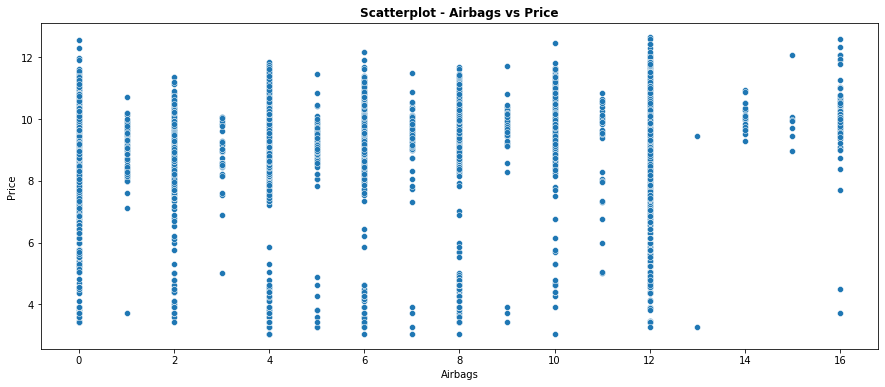

In [86]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Airbags', y='Price', data=train_df)
plt.title("Scatterplot - Airbags vs Price", fontweight='bold');

In [87]:
train_df = train_df[~((train_df['Airbags']==3)&(train_df['Price']<6))].copy()
train_df = train_df[~((train_df['Airbags']==7)&(train_df['Price']<6))].copy()
train_df = train_df[~((train_df['Airbags']==9)&(train_df['Price']<6))].copy()
train_df = train_df[~((train_df['Airbags']==16)&(train_df['Price']<6))].copy()
print(f"train_df: {train_df.shape}")

train_df: (15623, 41)


### Model

In [88]:
train_df['Model'] = train_df['Model'].apply(lambda x: ''.join(filter(lambda s: s in string.printable, x)))
train_df['Model'] = train_df['Model'].apply(lambda x: x.upper().replace(' ','-'))
train_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Hybrid_Car,Turbo_Engine,Per_cylinder_capacity,Age-of-car,Mileage_per_yr,Manual_Gear,Automatic_Gear,Continuous_Gear,Drive wheels Front,Drive wheels Rear
0,45654403,9.497697,7.244228,LEXUS,RX-450,2010,Jeep,1,Hybrid,1.504077,...,1,0,6.369901,2.484907,1.571979,0,1,0,1,1
1,44731507,9.718482,6.926577,CHEVROLET,EQUINOX,2011,Jeep,0,Petrol,1.386294,...,0,0,6.216606,2.397895,1.633343,1,1,0,1,1
2,45774419,9.044050,0.000000,HONDA,FIT,2006,Hatchback,0,Petrol,0.832909,...,0,0,5.786897,2.772589,1.417420,0,1,1,1,0
3,45769185,8.190909,6.760415,FORD,ESCAPE,2011,Jeep,1,Hybrid,1.252763,...,1,0,6.439350,2.397895,1.615938,0,1,0,1,1
4,45809263,9.369649,6.102559,HONDA,FIT,2014,Hatchback,1,Petrol,0.832909,...,0,0,5.786897,2.079442,1.768031,0,1,0,1,0


In [89]:
train_df['Len_Model'] = train_df['Model'].apply(lambda x: len(x))
train_df['Numbers_in_Model'] = train_df['Model'].apply(lambda x: 1 if bool(re.search(r'\d', x)) is True else 0)
train_df['Model_Numeric'] = train_df['Model'].apply(lambda x: 1 if x.isdigit() else 0)
train_df['Model_vowels'] = train_df['Model'].apply(lambda x: len([v for v in x if v in ['A','E','I','O','U']]))
train_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Mileage_per_yr,Manual_Gear,Automatic_Gear,Continuous_Gear,Drive wheels Front,Drive wheels Rear,Len_Model,Numbers_in_Model,Model_Numeric,Model_vowels
0,45654403,9.497697,7.244228,LEXUS,RX-450,2010,Jeep,1,Hybrid,1.504077,...,1.571979,0,1,0,1,1,6,1,0,0
1,44731507,9.718482,6.926577,CHEVROLET,EQUINOX,2011,Jeep,0,Petrol,1.386294,...,1.633343,1,1,0,1,1,7,0,0,4
2,45774419,9.044050,0.000000,HONDA,FIT,2006,Hatchback,0,Petrol,0.832909,...,1.417420,0,1,1,1,0,3,0,0,1
3,45769185,8.190909,6.760415,FORD,ESCAPE,2011,Jeep,1,Hybrid,1.252763,...,1.615938,0,1,0,1,1,6,0,0,3
4,45809263,9.369649,6.102559,HONDA,FIT,2014,Hatchback,1,Petrol,0.832909,...,1.768031,0,1,0,1,0,3,0,0,1


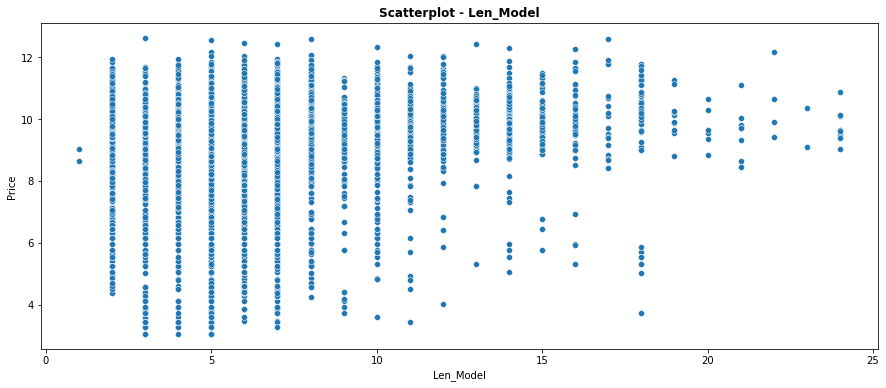

In [90]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Len_Model', y='Price', data=train_df)
plt.title("Scatterplot - Len_Model", fontweight='bold');

## Label Encoding

In [91]:
encode_cols = ['Manufacturer','Model','Category','Fuel type','Color']

for col in encode_cols:
    le = LabelEncoder().fit(train_df[col].append(test_df[col]))
    train_df[col] = le.transform(train_df[col])

print(f"train_df: {train_df.shape}")
train_df.head()

train_df: (15623, 45)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Mileage_per_yr,Manual_Gear,Automatic_Gear,Continuous_Gear,Drive wheels Front,Drive wheels Rear,Len_Model,Numbers_in_Model,Model_Numeric,Model_vowels
0,45654403,9.497697,7.244228,30,1854,2010,4,1,2,1.504077,...,1.571979,0,1,0,1,1,6,1,0,0
1,44731507,9.718482,6.926577,8,921,2011,4,0,5,1.386294,...,1.633343,1,1,0,1,1,7,0,0,4
2,45774419,9.044050,0.000000,21,996,2006,3,0,5,0.832909,...,1.417420,0,1,1,1,0,3,0,0,1
3,45769185,8.190909,6.760415,16,931,2011,4,1,2,1.252763,...,1.615938,0,1,0,1,1,6,0,0,3
4,45809263,9.369649,6.102559,21,996,2014,3,1,5,0.832909,...,1.768031,0,1,0,1,0,3,0,0,1


## Features Correlation

In [92]:
train_df = train_df[['Levy',
 'Manufacturer',
 'Model',
 'Prod. year',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags',
 'Manufacturer_vowels',
 'Prod. Year Group',
 'Fuel Tank Petrol',
 'Fuel Tank Diesel',
 'Fuel Tank Gas',
 'Hybrid_Car',
 'Turbo_Engine',
 'Per_cylinder_capacity',
 'Age-of-car',
 'Mileage_per_yr',
 'Manual_Gear',
 'Automatic_Gear',
 'Continuous_Gear',
 'Drive wheels Front',
 'Drive wheels Rear',
 'Len_Model',
 'Numbers_in_Model',
 'Model_Numeric',
 'Model_vowels',
 'Price']].copy()

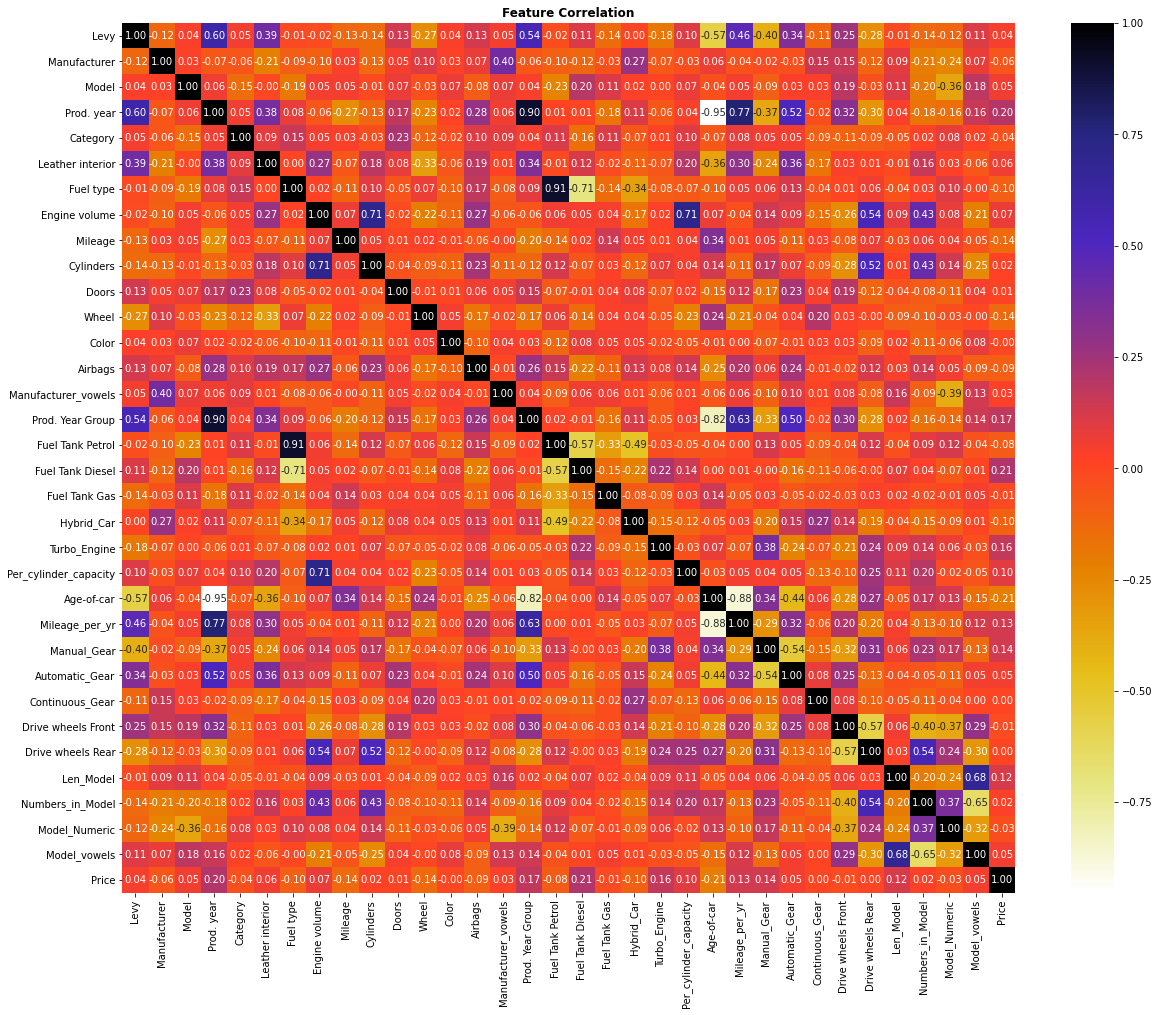

In [93]:
plt.subplots(1,1,figsize=(20, 16))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f', cmap="CMRmap_r")
plt.title("Feature Correlation", fontweight='bold');